In [1]:
import requests
from bs4 import BeautifulSoup
import pandas as pd

headers = {
    "User-Agent": "Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/115.0.0.0 Safari/537.36"
}

url = "https://fbref.com/en/comps/Big5/stats/players/Big-5-European-Leagues-Stats"
response = requests.get(url, headers=headers)

if response.status_code == 200:
    soup = BeautifulSoup(response.text, "html.parser")

    table_body = soup.find("tbody")
    rows = table_body.find_all("tr")
    columns = ['Player', 'Nation', 'Pos', 'Squad', 'Comp', 'Age', 'Born', 'MP', 'Starts', 'Min',
    '90s', 'Goals', 'Assists', 'G+A', 'G-PK', 'PK', 'PK_Attempted', 'Yellow', 'Red', 'xG', 'npxG',
    'xAG', 'npxG+xAG', 'Prg_Carries', 'Prg_Passes', 'Prg_Passes_Received', 'Goals_per90', 'Assists_per90', 'G+A_per90', 'G-PK_per90',
    'G+A-PK_per90', 'xG_per90', 'xAG_per90', 'xG+xAG_per90', 'npxG_per90', 'npxG+xAG_per90','Matches'] 
    df = pd.DataFrame(columns=columns)

    for row in rows:
        cols = row.find_all('td')
        if cols:
            data = [col.get_text() for col in cols]
            if len(data) == len(columns):
                df.loc[len(df)] = data
else:
    print(f"Failed to retrieve data. Status code: {response.status_code}")

In [47]:
premier_league_players = df[df['Comp'].str.contains('Premier League', case=False)]
SuperSubs = premier_league_players[premier_league_players['Player'].isin(['Jota Silva',
            'Christopher Nkunku',
            'Enes Ünal',
            'Harvey Barnes',
            'Jhon Durán',
            'Jack Taylor',
            'Rodrigo Muniz',
            'Joshua Zirkzee',
            'Ross Barkley',
            'Timo Werner',
            'Tommy Doyle',
            'Fabio Carvalho',
            'Ian Maatsen',
            'Taiwo Awoniyi',
            'Gonçalo Guedes'])]

In [ ]:
#nkunku unal duran

In [7]:
import numpy as np
from scipy import stats
import math

In [9]:
from urllib.request import urlopen

import matplotlib.pyplot as plt
from PIL import Image

from mplsoccer import PyPizza, add_image, FontManager

In [15]:
SuperSubs.head()

,Player,Nation,Pos,Squad,Comp,Age,Born,MP,Starts,Min,...,Assists_per90,G+A_per90,G-PK_per90,G+A-PK_per90,xG_per90,xAG_per90,xG+xAG_per90,npxG_per90,npxG+xAG_per90,Matches
153,Taiwo Awoniyi,ng NGA,FW,Nott'ham Forest,eng Premier League,27-154,1997,15,2,227,...,0.00,0.40,0.40,0.40,0.65,0.03,0.68,0.65,0.68,Matches
207,Ross Barkley,eng ENG,MF,Aston Villa,eng Premier League,31-039,1993,16,3,554,...,0.16,0.65,0.49,0.65,0.27,0.09,0.37,0.27,0.37,Matches
209,Harvey Barnes,eng ENG,FW,Newcastle Utd,eng Premier League,27-035,1997,20,6,782,...,0.12,0.69,0.58,0.69,0.34,0.28,0.62,0.34,0.62,Matches
412,Fabio Carvalho,pt POR,"FW,MF",Brentford,eng Premier League,22-136,2002,16,3,428,...,0.21,0.42,0.21,0.42,0.45,0.11,0.56,0.45,0.56,Matches
666,Tommy Doyle,eng ENG,MF,Wolves,eng Premier League,23-088,2001,16,3,435,...,0.21,0.21,0.00,0.21,0.10,0.11,0.20,0.10,0.20,Matches


In [49]:
SuperSubs.columns

Index(['Player', 'Nation', 'Pos', 'Squad', 'Comp', 'Age', 'Born', 'MP',
       'Starts', 'Min', '90s', 'Goals', 'Assists', 'G+A', 'G-PK', 'PK',
       'PK_Attempted', 'Yellow', 'Red', 'xG', 'npxG', 'xAG', 'npxG+xAG',
       'Prg_Carries', 'Prg_Passes', 'Prg_Passes_Received', 'Goals_per90',
       'Assists_per90', 'G+A_per90', 'G-PK_per90', 'G+A-PK_per90', 'xG_per90',
       'xAG_per90', 'xG+xAG_per90', 'npxG_per90', 'npxG+xAG_per90', 'Matches'],
      dtype='object')

In [51]:
SuperSubs = SuperSubs.drop(['Nation','Pos', 'Squad', 'Comp', 'Age', 'Born', 'MP', 'Starts', 'Min', '90s','Matches'],
                          axis=1).reset_index()

In [45]:
SuperSubs.head()

,index,Player,Goals,Assists,G+A,G-PK,PK,PK_Attempted,Yellow,Red,...,Assists_per90,G+A_per90,G-PK_per90,G+A-PK_per90,xG_per90,xAG_per90,xG+xAG_per90,npxG_per90,npxG+xAG_per90,Matches
0,153,Taiwo Awoniyi,1,0,1,1,0,0,0,0,...,0.00,0.40,0.40,0.40,0.65,0.03,0.68,0.65,0.68,Matches
1,207,Ross Barkley,3,1,4,3,0,0,3,0,...,0.16,0.65,0.49,0.65,0.27,0.09,0.37,0.27,0.37,Matches
2,209,Harvey Barnes,5,1,6,5,0,0,0,0,...,0.12,0.69,0.58,0.69,0.34,0.28,0.62,0.34,0.62,Matches
3,412,Fabio Carvalho,1,1,2,1,0,0,1,0,...,0.21,0.42,0.21,0.42,0.45,0.11,0.56,0.45,0.56,Matches
4,666,Tommy Doyle,0,1,1,0,0,0,1,0,...,0.21,0.21,0.00,0.21,0.10,0.11,0.20,0.10,0.20,Matches


In [53]:
params = list(SuperSubs.columns)
print(params)

['index', 'Player', 'Goals', 'Assists', 'G+A', 'G-PK', 'PK', 'PK_Attempted', 'Yellow', 'Red', 'xG', 'npxG', 'xAG', 'npxG+xAG', 'Prg_Carries', 'Prg_Passes', 'Prg_Passes_Received', 'Goals_per90', 'Assists_per90', 'G+A_per90', 'G-PK_per90', 'G+A-PK_per90', 'xG_per90', 'xAG_per90', 'xG+xAG_per90', 'npxG_per90', 'npxG+xAG_per90']


In [55]:
params = params[2:]

In [57]:
nkunku = SuperSubs.loc[SuperSubs['Player']=='Christopher Nkunku'].reset_index()
nkunku = list(nkunku.loc[0])
nkunku = nkunku[3:]
nkunku

['2',
 '1',
 '3',
 '2',
 '0',
 '0',
 '1',
 '0',
 '4.0',
 '4.0',
 '1.7',
 '5.6',
 '7',
 '10',
 '36',
 '0.45',
 '0.22',
 '0.67',
 '0.45',
 '0.67',
 '0.88',
 '0.37',
 '1.26',
 '0.88',
 '1.26']

In [59]:
print(len(params),len(nkunku))

25 25


In [61]:
values = []
for x in range(len(params)):
    values.append(math.floor(stats.percentileofscore(df[params[x]],nkunku[x])))

In [63]:
values

[83,
 72,
 82,
 84,
 47,
 46,
 46,
 46,
 94,
 95,
 87,
 94,
 91,
 18,
 62,
 92,
 87,
 92,
 94,
 93,
 98,
 97,
 99,
 99,
 99]

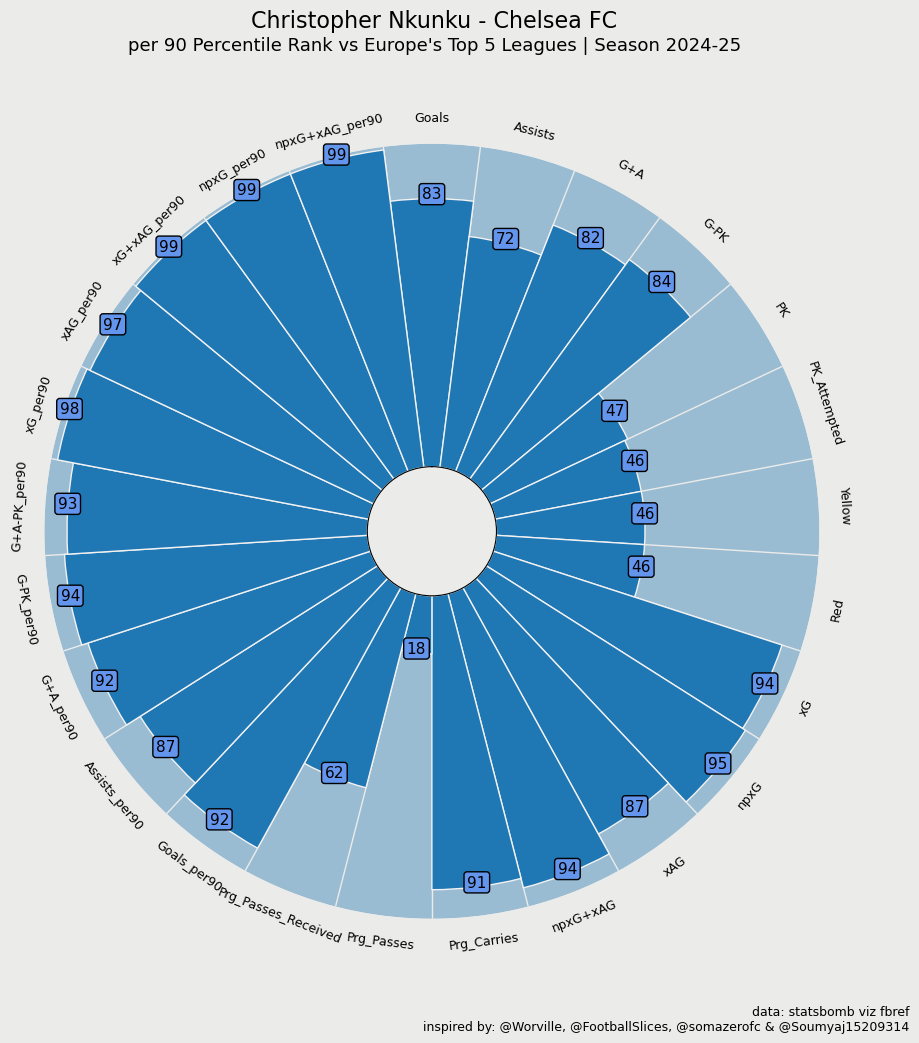

In [87]:

# instantiate PyPizza class
baker = PyPizza(
    params=params,                  # list of parameters
    background_color="#EBEBE9",     # background color
    straight_line_color="#EBEBE9",  # color for straight lines
    straight_line_lw=1,             # linewidth for straight lines
    last_circle_lw=0,               # linewidth of last circle
    other_circle_lw=0,              # linewidth for other circles
    inner_circle_size=20            # size of inner circle
)

# plot pizza
fig, ax = baker.make_pizza(
    values,                          # list of values
    figsize=(10, 10.5),                # adjust figsize according to your need
    color_blank_space="same",        # use same color to fill blank space       # color for individual slices
    blank_alpha=0.4,                 # alpha for blank-space colors
    kwargs_slices=dict(
        edgecolor="#F2F2F2", zorder=2, linewidth=1
    ),                               # values to be used when plotting slices
    kwargs_params=dict(
        color="#000000", fontsize=9,
        va="center"
    ),                               # values to be used when adding parameter
    kwargs_values=dict(
        color="#000000", fontsize=11,
        zorder=3,
        bbox=dict(
            edgecolor="#000000", facecolor="cornflowerblue",
            boxstyle="round,pad=0.2", lw=1
        )
    )                                # values to be used when adding parameter-values
)

# add title
fig.text(
    0.515, 0.975, "Christopher Nkunku - Chelsea FC", size=16,
    ha="center", color="#000000"
)

# add subtitle
fig.text(
    0.515, 0.953,
    "per 90 Percentile Rank vs Europe's Top 5 Leagues | Season 2024-25",
    size=13,
    ha="center", color="#000000"
)

# add credits
CREDIT_1 = "data: statsbomb viz fbref"
CREDIT_2 = "inspired by: @Worville, @FootballSlices, @somazerofc & @Soumyaj15209314"

fig.text(
    0.99, 0.02, f"{CREDIT_1}\n{CREDIT_2}", size=9,
    color="#000000",
    ha="right"
)
plt.show()

In [89]:
Unal = SuperSubs.loc[SuperSubs['Player']=='Enes Ünal'].reset_index()
Unal = list(Unal.loc[0])
Unal = Unal[3:]
Unal

['2',
 '1',
 '3',
 '2',
 '0',
 '0',
 '2',
 '0',
 '2.7',
 '2.7',
 '0.4',
 '3.1',
 '4',
 '12',
 '22',
 '0.52',
 '0.26',
 '0.78',
 '0.52',
 '0.78',
 '0.72',
 '0.10',
 '0.82',
 '0.72',
 '0.82']

In [95]:
print(len(params),len(Unal))

25 25


In [107]:
values_unal = []
for x in range(len(params)):
    values_unal.append(math.floor(stats.percentileofscore(df[params[x]],Unal[x])))

In [109]:
values_unal

[83,
 72,
 82,
 84,
 47,
 46,
 67,
 46,
 89,
 90,
 54,
 84,
 74,
 22,
 48,
 94,
 90,
 94,
 95,
 95,
 97,
 66,
 96,
 98,
 97]

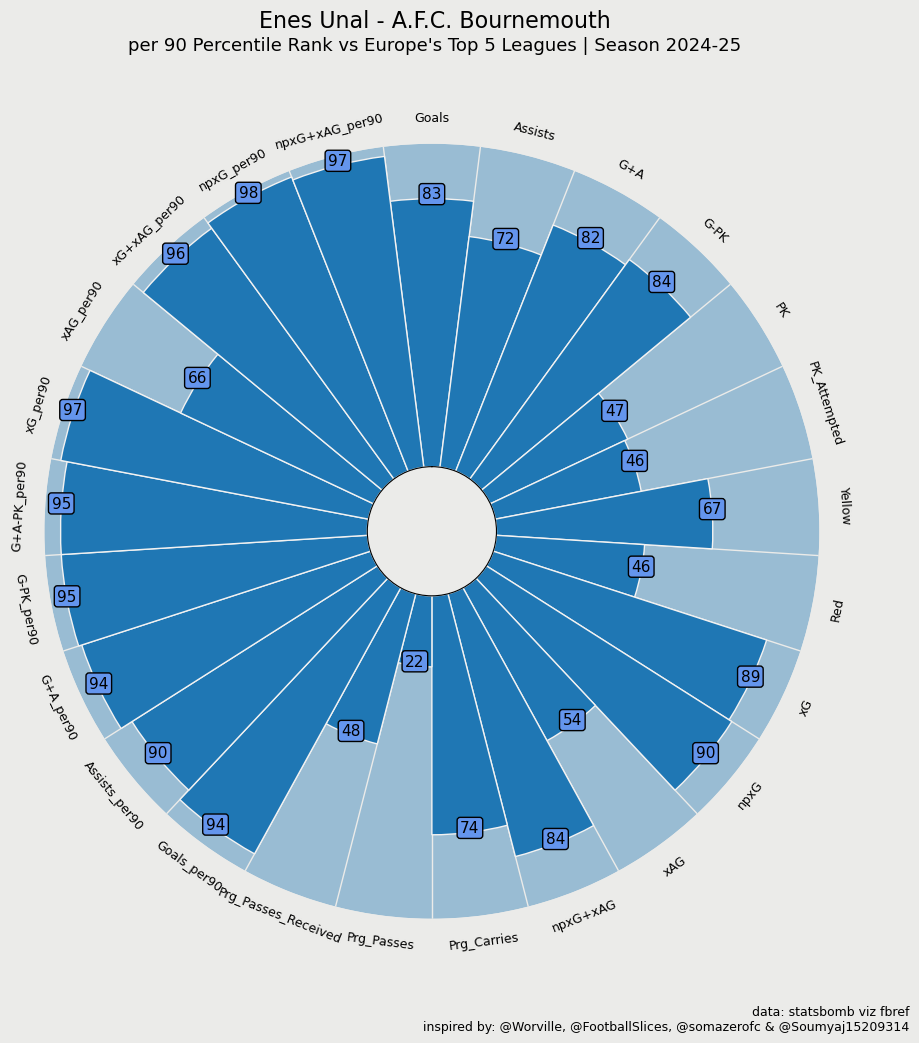

In [111]:
# instantiate PyPizza class
baker = PyPizza(
    params=params,                  # list of parameters
    background_color="#EBEBE9",     # background color
    straight_line_color="#EBEBE9",  # color for straight lines
    straight_line_lw=1,             # linewidth for straight lines
    last_circle_lw=0,               # linewidth of last circle
    other_circle_lw=0,              # linewidth for other circles
    inner_circle_size=20            # size of inner circle
)

# plot pizza
fig, ax = baker.make_pizza(
    values_unal,                          # list of values
    figsize=(10, 10.5),                # adjust figsize according to your need
    color_blank_space="same",        # use same color to fill blank space      
    blank_alpha=0.4,                 # alpha for blank-space colors
    kwargs_slices=dict(
        edgecolor="#F2F2F2", zorder=2, linewidth=1
    ),                               # values to be used when plotting slices
    kwargs_params=dict(
        color="#000000", fontsize=9,
        va="center"
    ),                               # values to be used when adding parameter
    kwargs_values=dict(
        color="#000000", fontsize=11,
        zorder=3,
        bbox=dict(
            edgecolor="#000000", facecolor="cornflowerblue",
            boxstyle="round,pad=0.2", lw=1
        )
    )                                # values to be used when adding parameter-values
)

# add title
fig.text(
    0.515, 0.975, "Enes Unal - A.F.C. Bournemouth", size=16,
    ha="center", color="#000000"
)

# add subtitle
fig.text(
    0.515, 0.953,
    "per 90 Percentile Rank vs Europe's Top 5 Leagues | Season 2024-25",
    size=13,
    ha="center", color="#000000"
)

# add credits
CREDIT_1 = "data: statsbomb viz fbref"
CREDIT_2 = "inspired by: @Worville, @FootballSlices, @somazerofc & @Soumyaj15209314"

fig.text(
    0.99, 0.02, f"{CREDIT_1}\n{CREDIT_2}", size=9,
    color="#000000",
    ha="right"
)
plt.show()

In [113]:
Duran = SuperSubs.loc[SuperSubs['Player']=='Jhon Durán'].reset_index()
Duran = list(Duran.loc[0])
Duran = Duran[3:]
Duran

['7',
 '0',
 '7',
 '7',
 '0',
 '0',
 '3',
 '1',
 '4.8',
 '4.8',
 '0.2',
 '5.0',
 '7',
 '13',
 '38',
 '1.05',
 '0.00',
 '1.05',
 '1.05',
 '1.05',
 '0.71',
 '0.03',
 '0.74',
 '0.71',
 '0.74']

In [115]:
values_duran = []
for x in range(len(params)):
    values_duran.append(math.floor(stats.percentileofscore(df[params[x]],Duran[x])))
values_duran

[98,
 31,
 96,
 99,
 47,
 46,
 81,
 96,
 96,
 97,
 42,
 92,
 91,
 24,
 63,
 99,
 31,
 98,
 99,
 98,
 97,
 39,
 95,
 98,
 96]

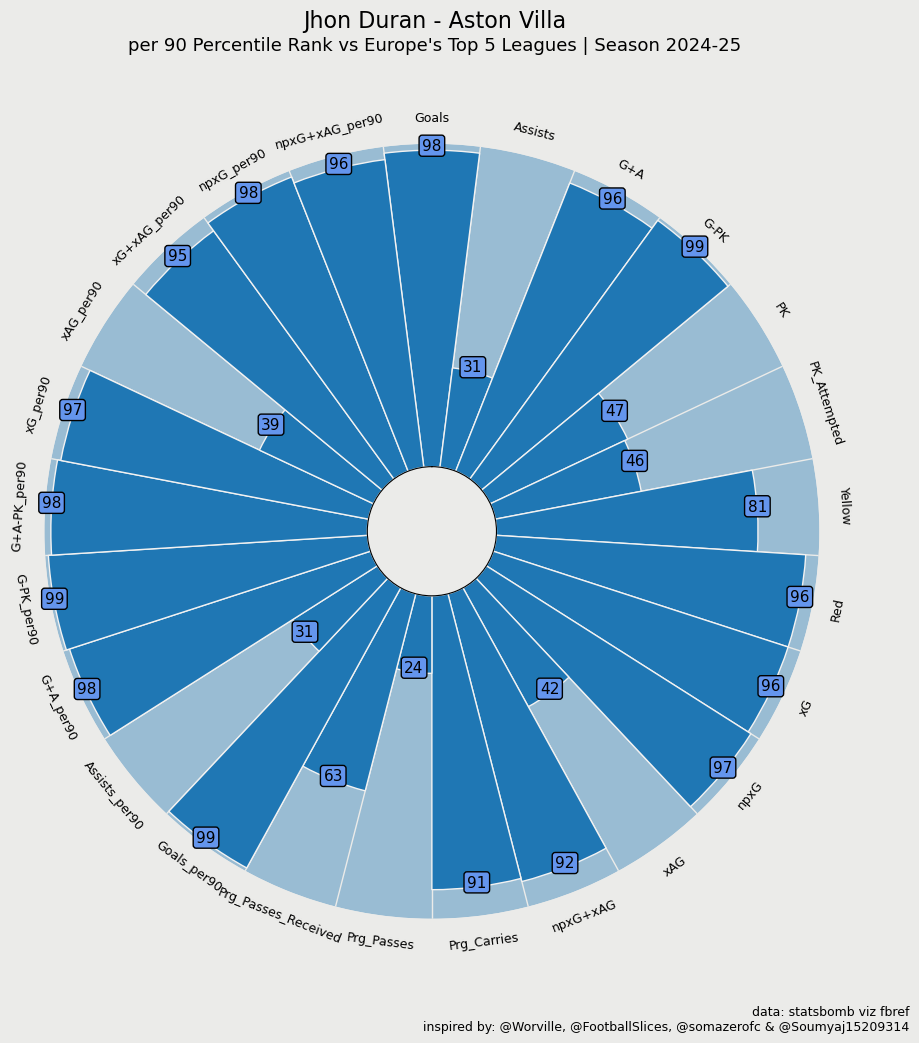

In [117]:
# instantiate PyPizza class
baker = PyPizza(
    params=params,                  # list of parameters
    background_color="#EBEBE9",     # background color
    straight_line_color="#EBEBE9",  # color for straight lines
    straight_line_lw=1,             # linewidth for straight lines
    last_circle_lw=0,               # linewidth of last circle
    other_circle_lw=0,              # linewidth for other circles
    inner_circle_size=20            # size of inner circle
)

# plot pizza
fig, ax = baker.make_pizza(
    values_duran,                          # list of values
    figsize=(10, 10.5),                # adjust figsize according to your need
    color_blank_space="same",        # use same color to fill blank space      
    blank_alpha=0.4,                 # alpha for blank-space colors
    kwargs_slices=dict(
        edgecolor="#F2F2F2", zorder=2, linewidth=1
    ),                               # values to be used when plotting slices
    kwargs_params=dict(
        color="#000000", fontsize=9,
        va="center"
    ),                               # values to be used when adding parameter
    kwargs_values=dict(
        color="#000000", fontsize=11,
        zorder=3,
        bbox=dict(
            edgecolor="#000000", facecolor="cornflowerblue",
            boxstyle="round,pad=0.2", lw=1
        )
    )                                # values to be used when adding parameter-values
)

# add title
fig.text(
    0.515, 0.975, "Jhon Duran - Aston Villa", size=16,
    ha="center", color="#000000"
)

# add subtitle
fig.text(
    0.515, 0.953,
    "per 90 Percentile Rank vs Europe's Top 5 Leagues | Season 2024-25",
    size=13,
    ha="center", color="#000000"
)

# add credits
CREDIT_1 = "data: statsbomb viz fbref"
CREDIT_2 = "inspired by: @Worville, @FootballSlices, @somazerofc & @Soumyaj15209314"

fig.text(
    0.99, 0.02, f"{CREDIT_1}\n{CREDIT_2}", size=9,
    color="#000000",
    ha="right"
)
plt.show()